PENJELASAN CRISP DM

In [ ]:
1. Bussiness Understanding
Inodensia adalah negara yaang akan kaya dengan hasil laut, terutama ikan.
Seringkali ikan menjadi menu makanan yang sehari hari dimakan, oleh karena itu
penjualan ikan dipasar semakin meningkat, maka semakin banyak ikan yang dihasilkan
maka semakin besar nilai jualnya. 

Nilai jual yang besar dikarenakan bobot ikan, untuk itu saya menganalisis
estimasi bobot ikan dari dataset yaang saya miliki.
 
Dataset ini di dapatkan dari kaggle "https://www.kaggle.com/datasets/aungpyaeap/fish-market" 

2. Data Understanding 
Data set ini berisi data yang berpengaruh terhadap bobot ikan,
seperti spesies, panjang, tinggi, dan lebar.

Species,Weight,Length1,Length2,Length3,Height,Width.
Species(jenis ikan)
Weight(bobot)
Length1(panjang vertikal (cm))
Length2(panjang diagonal (cm))
Length3(panjang silang (cm))
Height(tinggi dalam (cm))
Width(lebar diagonal (cm))

Berikut beserta tipe datanya :

 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)

3. Data Preparation
Tahap ini menentukan selseksi fitur, karena saya analisis dengan regresi linear maka
tipe yang digunakan numerik (float dan int)
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64

X : Length1,Length2,Length3,Height,Width.
Y: Weight

4. Modelling
Model algoritma regresion linear 

5. Evaluation
Setelah memakai model ini,maka mencari tingkat prediksi akurasi, dan mendapatkan 84%.
maka diterapkan inputan dan dilihat prediksinya, prediksi bisa dipercaya karena lebih dari 70%

6. Deployment
Model di import disimpan dalam bentuk sav
Di deploy di github dan ditampilkan juga di streamlit.





# deskripsi library yang digunakan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [9]:
df = pd.read_csv('Fish.csv')

# Deskripsi Dataset

In [10]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<Axes: >

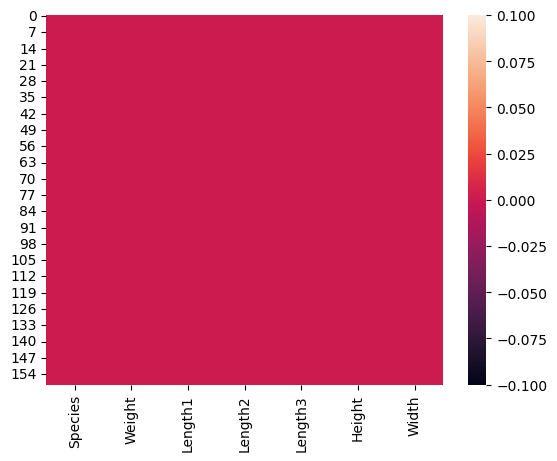

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_3896\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

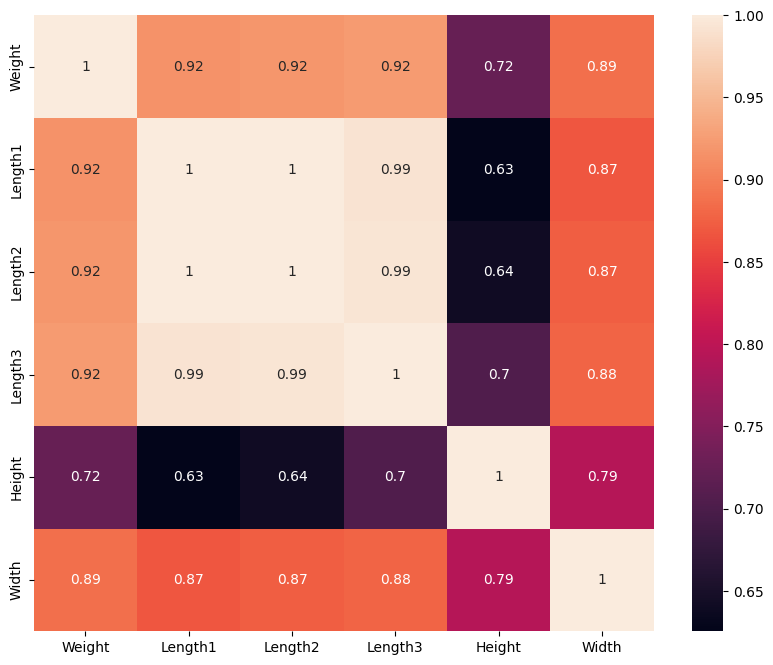

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Bobot ikan berdasarkan Species

In [15]:
category = df.groupby('Species').count()[['Weight']].sort_values(by='Weight',ascending=True).reset_index()
category = category.rename(columns={'Weight':'SpeciesOfWeight'})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Whitefish'),
  Text(1, 0, 'Parkki'),
  Text(2, 0, 'Smelt'),
  Text(3, 0, 'Pike'),
  Text(4, 0, 'Roach'),
  Text(5, 0, 'Bream'),
  Text(6, 0, 'Perch')])

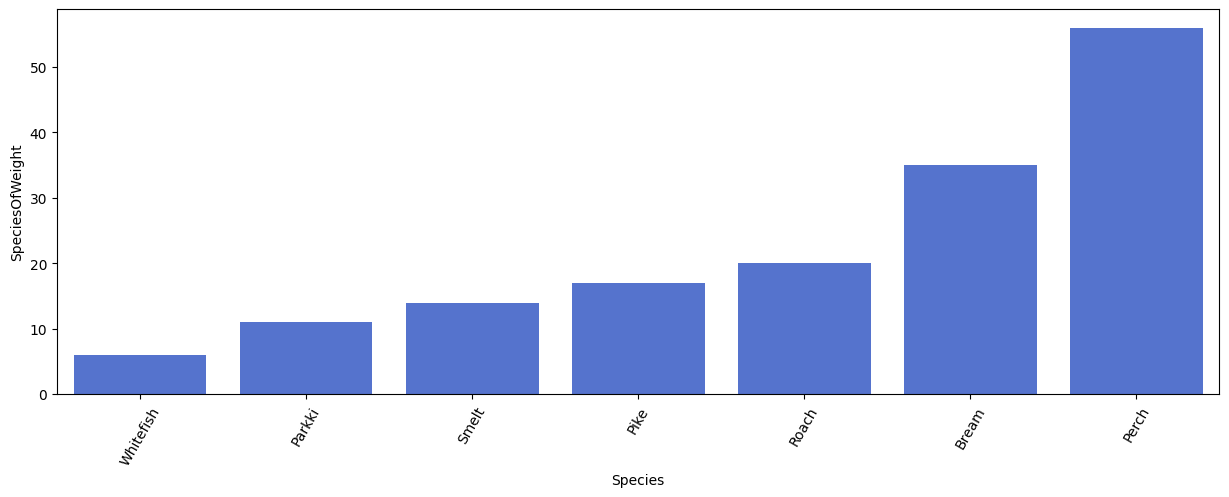

In [16]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['Species'], y=category['SpeciesOfWeight'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Width

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_3896\504419958.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Width'])


<Axes: xlabel='Width', ylabel='Density'>

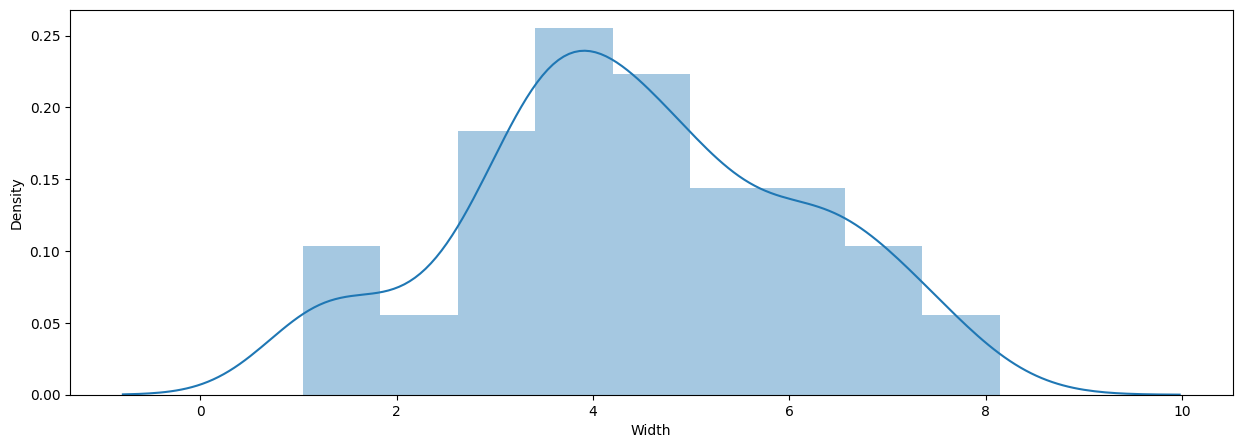

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['Width'])

# distribusi Jumlah bobot

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_3896\138829324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

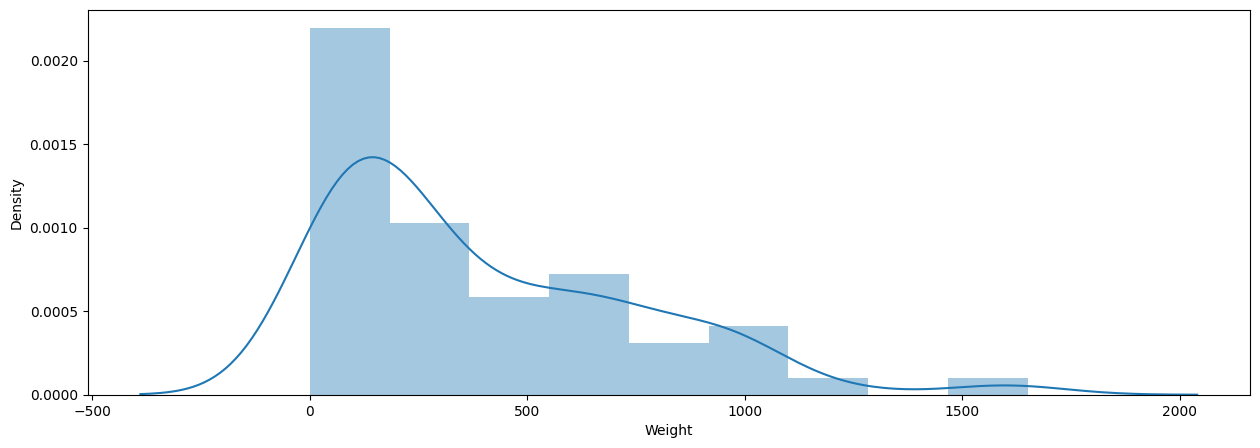

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df['Weight'])

# seleksi fitur

In [19]:
features = ['Length1','Length2','Length3','Height','Width']
x = df[features]
y = df['Weight']
x.shape, y.shape

((159, 5), (159,))

# split data training dan data testing

In [20]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(40,)

# membuat model regresi linier

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [22]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8453166287570826


# membuat inputan model regresi linier

In [23]:
input_data = np.array([[23.2,25.4,30,11.52,4.02]])


prediction = lr.predict(input_data) 
print('Estimasi Jumlah Bobot Ikan :', prediction)

Estimasi Jumlah Bobot Ikan : [333.60580311]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [24]:
import pickle

filename = 'estimasi_FishWeight.sav'
pickle.dump(lr,open(filename,'wb'))